In [383]:
import pandas as pd
import numpy as np
import random as rnd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [384]:
df = pd.read_csv(r'C:\Users\#732\Desktop\DS\Untitled Folder 5\laptop_price.csv')
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [385]:
df.dtypes

laptop_ID             int64
Company              object
Product              object
TypeName             object
Inches              float64
ScreenResolution     object
Cpu                  object
Ram                  object
Memory               object
Gpu                  object
OpSys                object
Weight               object
Price_euros         float64
dtype: object

In [386]:
plt.rcParams["figure.figsize"] = (18, 11.5)
plt.style.use('bmh')
sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'#f0f0f0'})

PROPS = {
    'boxprops':{'edgecolor':'black'},
    'medianprops':{'color':'black'},
    'whiskerprops':{'color':'black'},
    'capprops':{'color':'black'}
}


def plot_box(x, y, xlabel, ylabel, title, subtitle, color, title_position, subtitle_position, order=None):
    ax = sns.boxplot(data = df, y = y, x = x, order = order,
                 linewidth = 1.2, color = color, **PROPS,
                 flierprops = dict(marker = 'o', markeredgecolor = 'black', markersize = 6.5, linestyle = 'none', markerfacecolor = color, alpha = 0.9))

    plt.xlabel(xlabel, fontweight = 'bold', fontsize = 16)
    plt.ylabel(ylabel, fontweight = 'bold', fontsize = 16)
    ax.tick_params(labelsize = 14)
    ax.text(x = title_position, y = 1.07, s = title, fontsize = 22.5, weight = 'bold', ha = 'center', va = 'bottom', transform = ax.transAxes)
    ax.text(x = subtitle_position, y = 1.03, s = subtitle, fontsize = 16.5, alpha = 0.75, ha = 'center', va = 'bottom', transform = ax.transAxes)
    plt.show()

def plot_scatter(x, y, xlabel, ylabel, title, subtitle, color, title_position, subtitle_position, size, alpha):
    ax = sns.scatterplot(data = df, y = y, x = x,
                 linewidth = 1.2, color = color, s = size, alpha = alpha, marker = "o", edgecolor = "black")

    plt.xlabel(xlabel, fontweight = 'bold', fontsize = 16)
    plt.ylabel(ylabel, fontweight = 'bold', fontsize = 16)
    ax.text(x = title_position, y = 1.07, s = title, fontsize = 22.5, weight = 'bold', ha = 'center', va = 'bottom', transform = ax.transAxes)
    ax.text(x = subtitle_position, y = 1.03, s = subtitle, fontsize = 16.5, alpha = 0.75, ha = 'center', va = 'bottom', transform = ax.transAxes)
    plt.show()

In [387]:
#check duplicate data 
def check_duplicate(df):
    if df.duplicated().all():
        return  'There are duplicate Data in Data Frame Nedded To be  removed ' 
    else :
        return 'Data Is clean ,No Duplicate Data Found'
    
check_duplicate(df)

'Data Is clean ,No Duplicate Data Found'

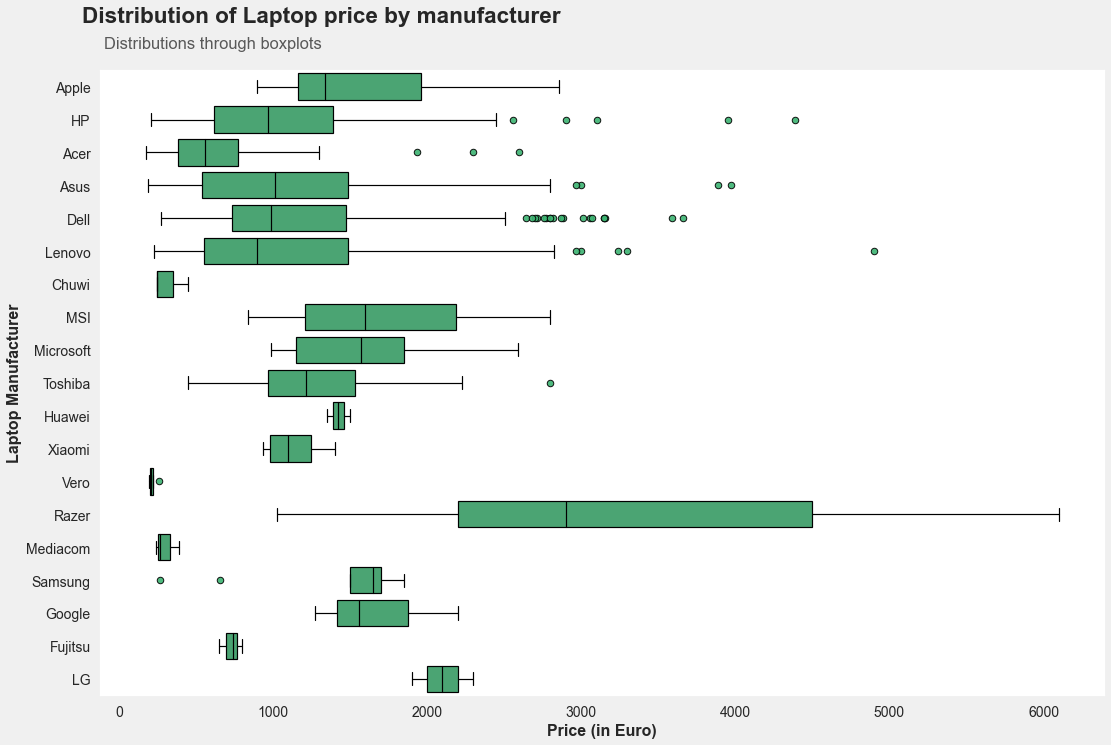

In [388]:
plot_box(x = "Price_euros", y = "Company", xlabel = 'Price (in Euro)', ylabel = "Laptop Manufacturer", title = "Distribution of Laptop price by manufacturer",
         subtitle = "Distributions through boxplots", color = "mediumseagreen", title_position = 0.22, subtitle_position = 0.112)


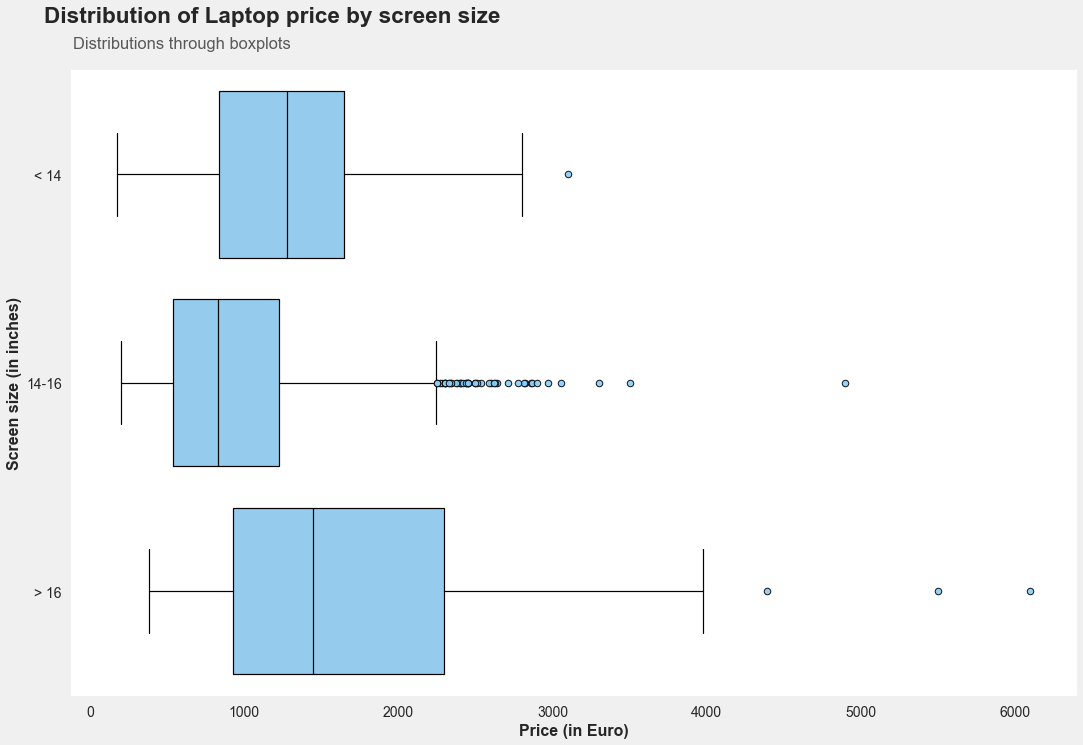

In [389]:
#Categorizing screen size to less than 14 inches, in between 14 and 16 inches, and more than 16 inches. (This is done)
conditions = [
    (df["Inches"].lt(14)),
    (df["Inches"].ge(14) & df["Inches"].lt(16)),
    (df["Inches"].ge(16)),
]
choices = ["< 14", "14-16", "> 16"]

df["Inches"] = np.select(conditions, choices)

plot_box(x = "Price_euros", y = "Inches", xlabel = 'Price (in Euro)', ylabel = "Screen size (in inches)", title = "Distribution of Laptop price by screen size",
         subtitle = "Distributions through boxplots", color = "lightskyblue", order = ["< 14", "14-16", "> 16"], title_position = 0.2,
         subtitle_position = 0.11)

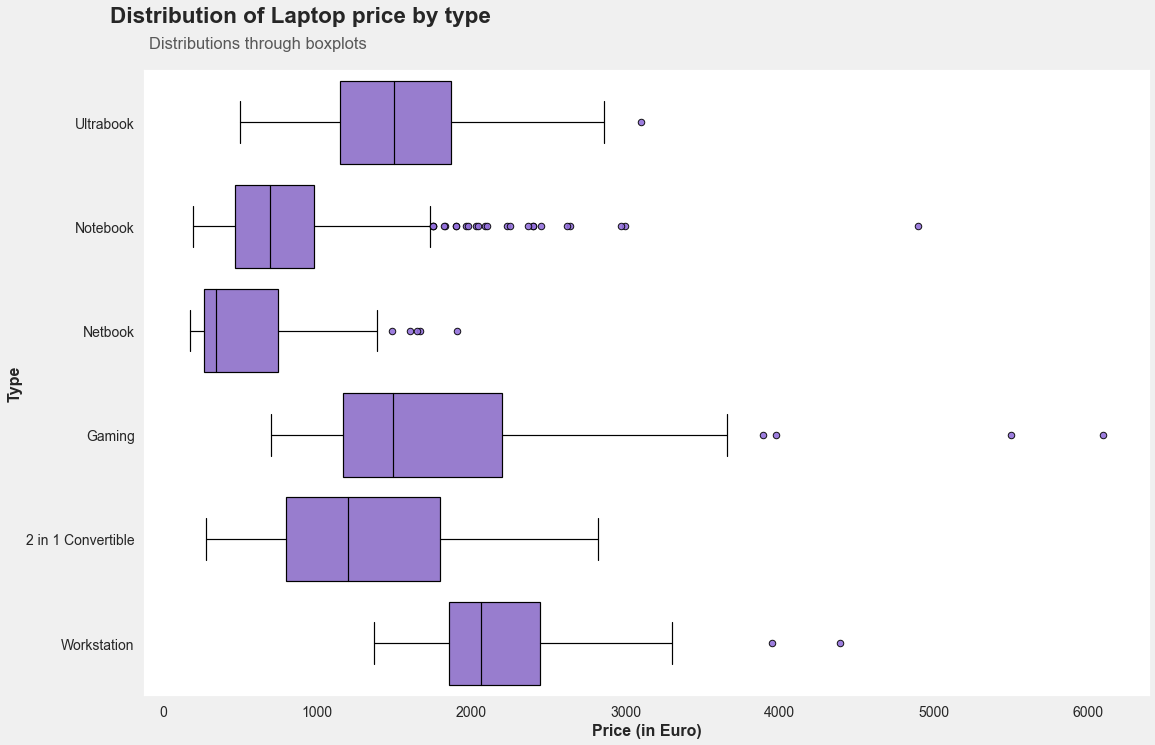

In [390]:
plot_box(x = "Price_euros", y = "TypeName", xlabel = 'Price (in Euro)', ylabel = "Type", title =  "Distribution of Laptop price by type",
         subtitle = "Distributions through boxplots", color = "mediumpurple", title_position = 0.155, subtitle_position = 0.113)

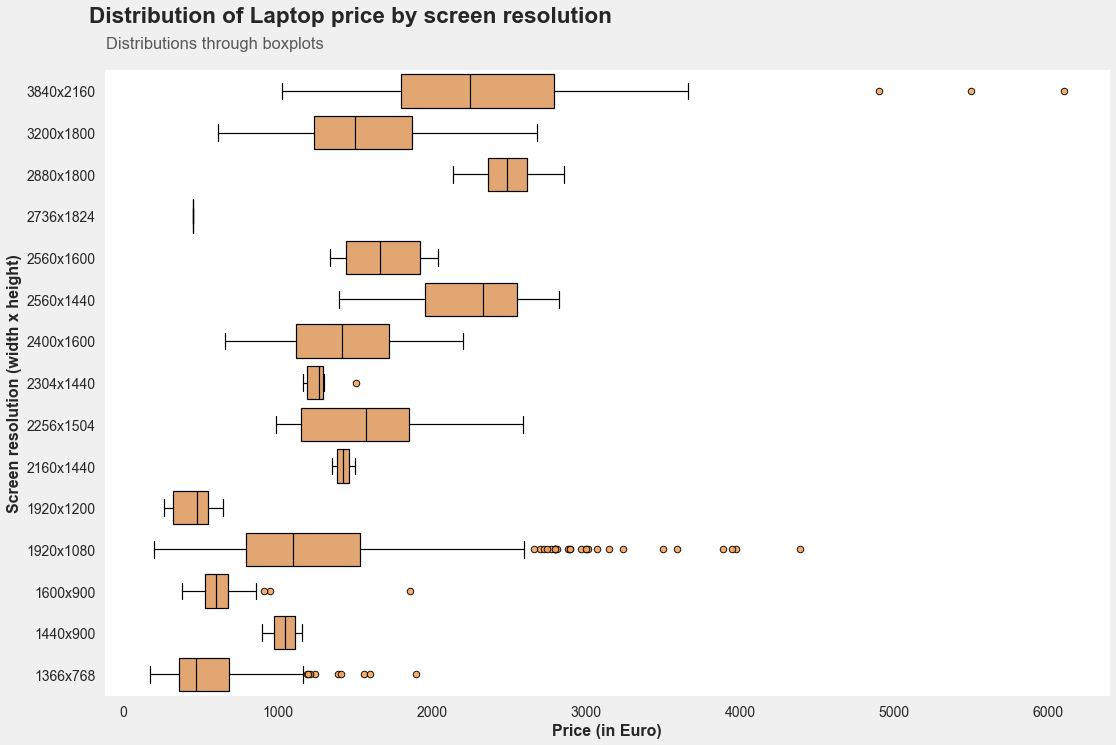

In [391]:
df["ScreenResolution"] = df["ScreenResolution"].astype('string')
df["ScreenResolution"] = df["ScreenResolution"].str.replace('4K', '', regex=True)
df["ScreenResolution"] = df["ScreenResolution"].str.replace('\D', '', regex=True)

def insert_dash(string, index):
    return string[:index] + 'x' + string[index:]

i = 0

for i in range(0,len(df["ScreenResolution"])):
    df["ScreenResolution"][i] = insert_dash(df["ScreenResolution"][i],4)
    i = i +1

plot_box(x = "Price_euros", y = "ScreenResolution", xlabel = 'Price (in Euro)', ylabel = "Screen resolution (width x height)", title = "Distribution of Laptop price by screen resolution",
         subtitle = "Distributions through boxplots", color = "sandybrown", title_position = 0.245, subtitle_position = 0.11,
         order = ["3840x2160", "3200x1800", "2880x1800", "2736x1824", "2560x1600", "2560x1440", "2400x1600", "2304x1440", "2256x1504", "2160x1440", 
                  "1920x1200", "1920x1080","1600x900", "1440x900", "1366x768"])


In [392]:
df

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,< 14,2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,< 14,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,14-16,1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,14-16,2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,< 14,2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1316,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14-16,1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,638.00
1299,1317,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,< 14,3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,1499.00
1300,1318,Lenovo,IdeaPad 100S-14IBR,Notebook,14-16,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,229.00
1301,1319,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,14-16,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,764.00


In [393]:
np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning) 

df["ScreenWidth"] = ""

for i in range(0, len(df["ScreenResolution"])):
    df["ScreenWidth"][i] = df["ScreenResolution"][i][:4]
    i = i +1
    
df["ScreenWidth"] = df["ScreenWidth"].astype('int')

df["ScreenHeight"] = ""

for i in range(0, len(df["ScreenResolution"])):
    df["ScreenHeight"][i] = df["ScreenResolution"][i][5:]
    i = i +1
    
df["ScreenHeight"] = df["ScreenHeight"].astype('int')

del df['ScreenResolution']

In [394]:
df

,laptop_ID,Company,Product,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,ScreenWidth,ScreenHeight
0,1,Apple,MacBook Pro,Ultrabook,< 14,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,2560,1600
1,2,Apple,Macbook Air,Ultrabook,< 14,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94,1440,900
2,3,HP,250 G6,Notebook,14-16,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00,1920,1080
3,4,Apple,MacBook Pro,Ultrabook,14-16,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45,2880,1800
4,5,Apple,MacBook Pro,Ultrabook,< 14,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,2560,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1316,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14-16,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,638.00,1920,1080
1299,1317,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,< 14,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,1499.00,3200,1800
1300,1318,Lenovo,IdeaPad 100S-14IBR,Notebook,14-16,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,229.00,1366,768
1301,1319,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,14-16,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,764.00,1366,768


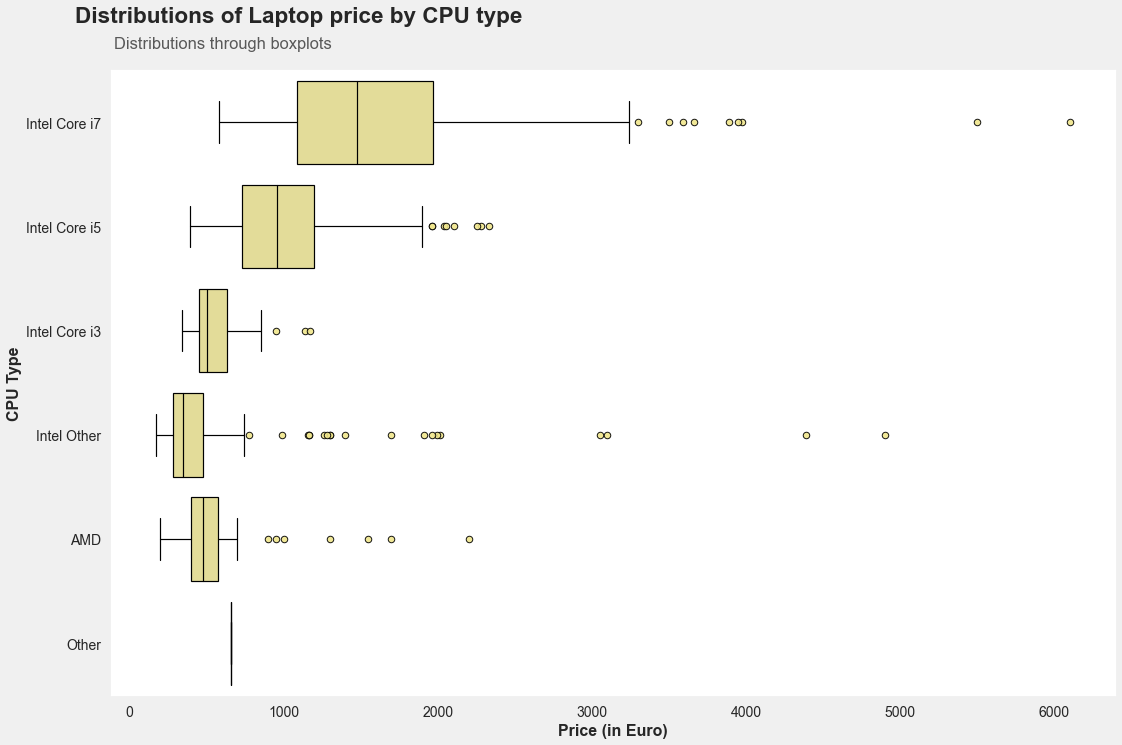

In [395]:
#Categorizing various versions of CPU by replacing to specified processors.
df['Cpu'] = df['Cpu'].replace(['Intel Core i7 7700HQ 2.8GHz', 'Intel Core i7 7500U 2.7GHz', 'Intel Core i7 8550U 1.8GHz', 'Intel Core i7 6920HQ 2.9GHz',
                              'Intel Core i7 2.7GHz', 'Intel Core i7 6500U 2.5GHz', 'Intel Core i7 6700HQ 2.6GHz', 'Intel Core i7 6560U 2.2GHz',
                              'Intel Core i7 2.9GHz', 'Intel Core i7 6600U 2.6GHz', 'Intel Core i7 7600U 2.8GHz', 'Intel Core i7 6820HK 2.7GHz',
                              'Intel Core i7 7820HK 2.9GHz', 'Intel Core i7 6820HQ 2.7GHz', 'Intel Core i7 7Y75 1.3GHz', 'Intel Core i7 7820HQ 2.9GHz',
                              'Intel Core i7 7660U 2.5GHz', 'Intel Core i7 6500U 2.50GHz', 'Intel Core i7 7500U 2.5GHz', 'Intel Core i7 2.2GHz', 'Intel Core i7 2.8GHz',
                              'Intel Core i7 7560U 2.4GHz', 'Intel Core i7 8650U 1.9GHz', 'Intel Core i7 7700HQ 2.7GHz'], 'Intel Core i7')
df['Cpu'] = df['Cpu'].replace(['Intel Core i5 7200U 2.5GHz', 'Intel Core i5 8250U 1.6GHz', 'Intel Core i5 7200U 2.50GHz', 'Intel Core i5 2.9GHz', 'Intel Core i5 7300U 2.6GHz',
                              'Intel Core i5 6440HQ 2.6GHz', 'Intel Core i5 6200U 2.3GHz', 'Intel Core i5 7300HQ 2.5GHz', 'Intel Core i5 2.0GHz', 'Intel Core i5 6300U 2.4GHz',
                              'Intel Core i5 6300HQ 2.3GHz', 'Intel Core i5 7440HQ 2.8GHz', 'Intel Core i5 7Y54 1.2GHz', 'Intel Core i5 1.6GHz', 'Intel Core i5 1.8GHz',
                              'Intel Core i5 3.1GHz', 'Intel Core i5 1.3GHz', 'Intel Core i5 7200U 2.7GHz', 'Intel Core i5 2.3GHz', 'Intel Core i5 7Y57 1.2GHz',
                              'Intel Core i5 6260U 1.8GHz', 'Intel Core i5 7500U 2.7GHz', 'Intel Core i5 7200U 2.70GHz'], 'Intel Core i5')
df['Cpu'] = df['Cpu'].replace(['Intel Core i3 6006U 2GHz', 'Intel Core i3 7100U 2.4GHz', 'Intel Core i3 6006U 2.0GHz', 'Intel Core i3 6100U 2.3GHz', 'Intel Core i3 7130U 2.7GHz',
                              'Intel Core i3 6100U 2.1GHz', 'Intel Core i3 6006U 2.2GHz'], 'Intel Core i3')
df['Cpu'] = df['Cpu'].replace(['Intel Pentium Dual Core 4405U 2.1GHz', 'Intel Core M m3-7Y30 2.2GHz', 'Intel Core M 7Y30 1.0GHz', 'Intel Core M 6Y54 1.1GHz',
                              'Intel Pentium Dual Core N4200 1.1GHz', 'Intel Celeron Quad Core N3710 1.6GHz', 'Intel Core M M3-6Y30 0.9GHz', 'Intel Celeron Dual Core N3350 1.1GHz',
                              'Intel Atom Z8350 1.92GHz', 'Intel Celeron Dual Core N3350 1.1GHz', 'Intel Celeron Dual Core N3060 1.6GHz', 'Intel Pentium Quad Core N4200 1.1GHz',
                              'Intel Pentium Quad Core N3710 1.6GHz', 'Intel Celeron Dual Core N3050 1.6GHz', 'Intel Celeron Quad Core N3450 1.1GHz',
                              'Intel Atom x5-Z8350 1.44GHz', 'Intel Core M 6Y75 1.2GHz', 'Intel Celeron Dual Core 3205U 1.5GHz', 'Intel Atom x5-Z8550 1.44GHz',
                              'Intel Celeron Dual Core 3855U 1.6GHz', 'Intel Core M 6Y30 0.9GHz', 'Intel Xeon E3-1505M V6 3GHz', 'Intel Core M 1.2GHz',
                              'Intel Pentium Quad Core N3700 1.6GHz', 'Intel Celeron Dual Core N3060 1.60GHz', 'Intel Core M m7-6Y75 1.2GHz', 'Intel Celeron Dual Core N3350 2.0GHz',
                              'Intel Atom x5-Z8300 1.44GHz', 'Intel Core M m3 1.2GHz', 'Intel Xeon E3-1535M v5 2.9GHz', 'Intel Celeron Dual Core N3350 2GHz',
                              'Intel Atom X5-Z8350 1.44GHz', 'Intel Core M M7-6Y75 1.2GHz', 'Intel Xeon E3-1535M v6 3.1GHz', 'Intel Pentium Dual Core 4405Y 1.5GHz',
                              'Intel Core M 1.1GHz', 'Intel Celeron Quad Core N3160 1.6GHz'], 'Intel Other')
df['Cpu'] = df['Cpu'].replace(['AMD E-Series 9000e 1.5GHz', 'AMD E-Series E2-6110 1.5GHz', 'AMD E-Series 9000 2.2GHz', 'AMD Ryzen 1600 3.2GHz', 'AMD A9-Series 9420 3GHz',
                              'AMD A6-Series 9220 2.5GHz', 'AMD A12-Series 9720P 3.6GHz', 'AMD A8-Series 7410 2.2GHz', 'AMD A9-Series 9410 2.9GHz', 'AMD Ryzen 1700 3GHz',
                              'AMD A12-Series 9700P 2.5GHz', 'AMD A4-Series 7210 2.2GHz', 'AMD FX 9830P 3GHz', 'AMD E-Series E2-9000 2.2GHz', 'AMD A6-Series 7310 2GHz',
                              'AMD E-Series 6110 1.5GHz', 'AMD A9-Series A9-9420 3GHz', 'AMD A12-Series 9720P 2.7GHz', 'AMD E-Series 7110 1.8GHz', 'AMD FX 8800P 2.1GHz',
                              'AMD A6-Series 9220 2.9GHz', 'AMD A9-Series 9420 2.9GHz', 'AMD A10-Series 9600P 2.4GHz', 'AMD E-Series E2-9000e 1.5GHz', 'AMD A10-Series A10-9620P 2.5GHz',
                              'AMD A6-Series A6-9220 2.5GHz', 'AMD A10-Series 9620P 2.5GHz'], 'AMD')
df['Cpu'] = df['Cpu'].replace(['Samsung Cortex A72&A53 2.0GHz'], 'Other')

plot_box(x = "Price_euros", y = "Cpu", xlabel = 'Price (in Euro)', ylabel = "CPU Type", title = "Distributions of Laptop price by CPU type",
         subtitle = "Distributions through boxplots", color = "khaki", title_position = 0.187, subtitle_position = 0.112, 
         order = ["Intel Core i7", "Intel Core i5", "Intel Core i3", "Intel Other", "AMD", "Other"])

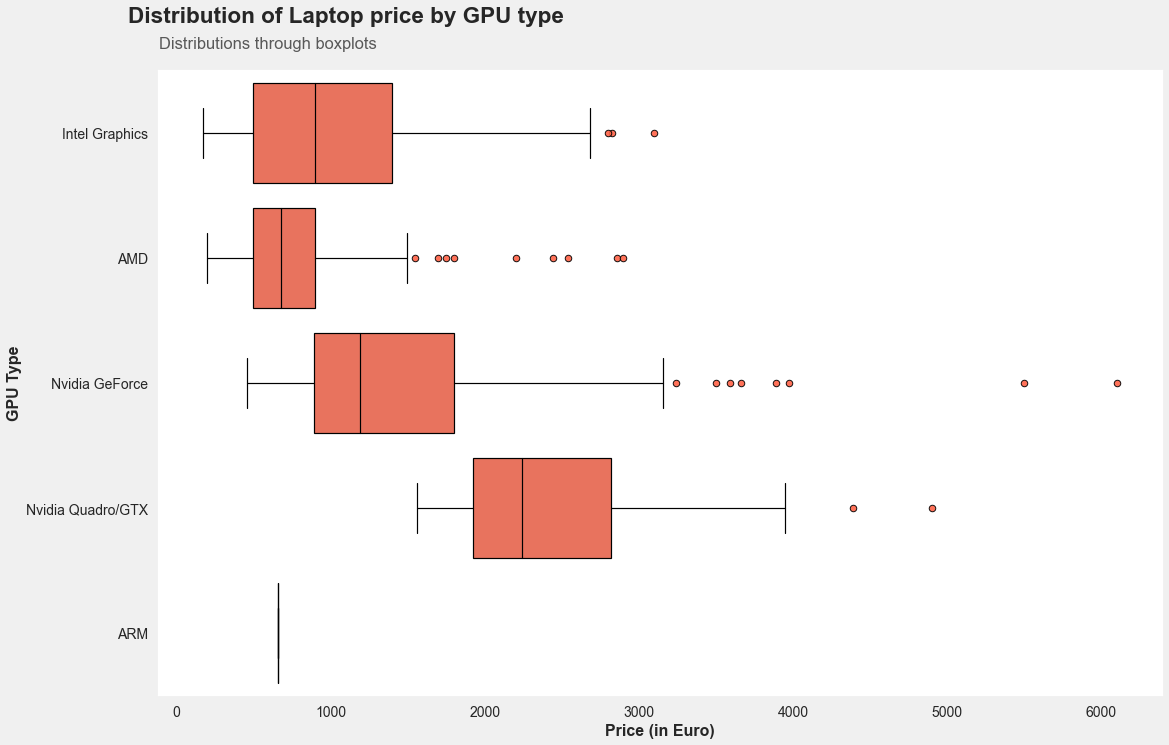

In [396]:
#Categorizing various versions of GPU by replacing to specified brands.
df['Gpu'] = df['Gpu'].replace(['Nvidia GeForce GTX 1050', 'Nvidia GeForce GTX 1060', 'Nvidia GeForce 940MX', 'Nvidia GeForce GTX 1070', 'Nvidia GeForce GTX 1050 Ti',
                               'Nvidia GeForce 930MX', 'Nvidia GeForce MX150', 'Nvidia GeForce GTX 960M', 'Nvidia GeForce 920MX', 'Nvidia GeForce GTX 980M', 'Nvidia GeForce GTX 950M',
                               'Nvidia GeForce 930M', 'Nvidia GeForce 920M', 'Nvidia GeForce MX130', 'Nvidia GeForce GTX 1080', 'Nvidia GeForce 920MX', 'Nvidia GeForce 930MX',
                               'Nvidia GeForce GTX 970M', 'Nvidia GeForce GT 940MX', 'Nvidia GeForce GTX 965M', 'Nvidia GeForce 920MX', 'Nvidia GeForce 930MX', 'Nvidia GeForce GTX 940MX',
                               'Nvidia GeForce GTX 1050M', 'Nvidia GeForce 150MX', 'Nvidia GeForce GTX 1050Ti', 'Nvidia GeForce GTX 960', 'Nvidia GeForce GTX 960<U+039C>',
                               'Nvidia GeForce GTX1050 Ti', 'Nvidia GeForce GTX1080', 'Nvidia GeForce 920', 'Nvidia GeForce GTX 980', 'Nvidia GeForce 930MX', 'Nvidia GeForce 960M',
                               'Nvidia GeForce 920MX', 'Nvidia GeForce 940M', 'Nvidia GeForce GTX 980', 'Nvidia GeForce GTX 1070M', 'Nvidia GeForce GTX 930MX', 'Nvidia GeForce GTX1060',
                               'Nvidia GeForce GTX 940M', 'Nvidia GeForce 930MX ', 'Nvidia GeForce 920MX', 'Nvidia GeForce GTX 980',  'Nvidia GeForce 920MX ', 'Nvidia GeForce GTX 980 '], 'Nvidia GeForce')
df['Gpu'] = df['Gpu'].replace(['Nvidia Quadro M1200', 'Nvidia Quadro M620', 'Nvidia Quadro M1000M', 'Nvidia Quadro M2200M', 'Nvidia Quadro M2200', 'Nvidia Quadro M520M', 
                               'Nvidia Quadro M2000M', 'Nvidia Quadro M3000M', 'Nvidia Quadro M620M', 'Nvidia GTX 980 SLI', 'Nvidia Quadro 3000M', 'Nvidia Quadro M500M'], 'Nvidia Quadro/GTX')
df['Gpu'] = df['Gpu'].replace(['Intel HD Graphics 620', 'Intel HD Graphics 520', 'Intel UHD Graphics 620', 'Intel HD Graphics 500', 'Intel HD Graphics 400', 'Intel Iris Graphics 540',
                               'Intel HD Graphics', 'Intel HD Graphics 515', 'Intel HD Graphics 615', 'Intel HD Graphics 505', 'Intel HD Graphics 405', 'Intel Iris Plus Graphics 640',
                               'Intel HD Graphics 6000', 'Intel HD Graphics 510', 'Intel HD Graphics 630', 'Intel HD Graphics 5300', 'Intel Iris Plus Graphics 650', 'Intel HD Graphics 620',
                               'Intel Iris Graphics 550', 'Intel Iris Pro Graphics', 'Intel Graphics 620', 'Intel HD Graphics 620', 'Intel HD Graphics 540', 'Intel HD Graphics 530', 
                               'Intel HD Graphics 620', 'Intel HD Graphics 620 '], 'Intel Graphics')
df['Gpu'] = df['Gpu'].replace(['AMD Radeon 530', 'AMD Radeon R5 M430', 'AMD Radeon 520', 'AMD Radeon R7 M445', 'AMD Radeon R5', 'AMD Radeon R5 M420', 'AMD Radeon R5 M330',
                               'AMD Radeon R2', 'AMD Radeon R4 Graphics', 'AMD Radeon RX 580', 'AMD Radeon R7 M440', 'AMD Radeon RX 550', 'AMD Radeon R2 Graphics', 'AMD Radeon R5 M420X',
                               'AMD Radeon R4', 'AMD Radeon RX 540', 'AMD Radeon R7 M460', 'AMD FirePro W4190M', 'AMD Radeon R7 M360', 'AMD Radeon 540', 'AMD FirePro W4190M',
                               'AMD Radeon R7 Graphics', 'AMD Radeon Pro 560', 'AMD Radeon R7', 'AMD Radeon RX 560', 'AMD Radeon Pro 455', 'AMD FirePro W6150M', 'AMD Radeon R3',
                               'AMD R4 Graphics', 'AMD Radeon Pro 555', 'AMD Radeon R5 430', 'AMD Radeon R7 M465', 'AMD R17M-M1-70', 'AMD Radeon R5 M315', 'AMD Radeon R7 M365X',
                               'AMD Radeon R9 M385', 'AMD FirePro W5130M', 'AMD Radeon R5 520', 'AMD FirePro W4190M '], 'AMD')
df['Gpu'] = df['Gpu'].replace(['ARM Mali T860 MP4'], 'ARM')


plot_box(x = "Price_euros", y = "Gpu", xlabel = 'Price (in Euro)', ylabel = "GPU Type", title = "Distribution of Laptop price by GPU type",
         subtitle = "Distributions through boxplots", color = "tomato", title_position = 0.187, subtitle_position = 0.11)

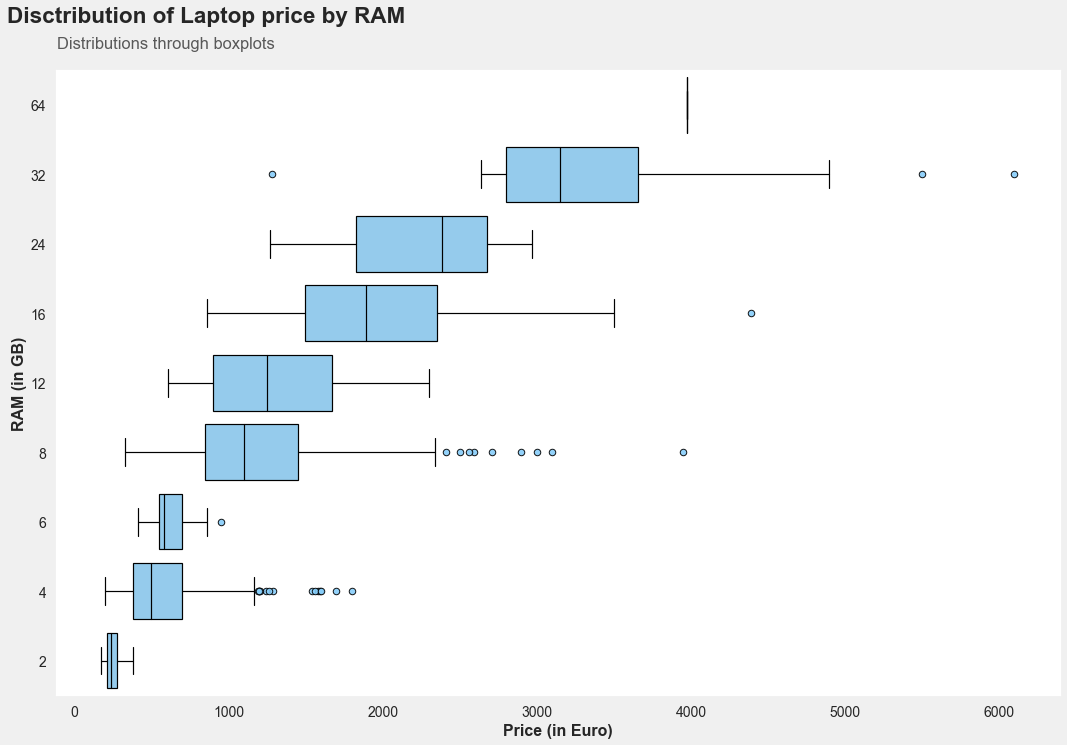

In [397]:
# Converting RAM space to numbers only (removing the string 'GB')
df["Ram"] = df["Ram"].str.replace('\D', '', regex=True)

plot_box(x = "Price_euros", y = "Ram", xlabel = 'Price (in Euro)', ylabel = "RAM (in GB)", title = "Disctribution of Laptop price by RAM",
         subtitle = "Distributions through boxplots", color = "lightskyblue", title_position = 0.15, subtitle_position = 0.11,
         order = ["64", "32", "24", "16", "12", "8", "6", "4", "2"])

df["Ram"] = df["Ram"].astype('int')

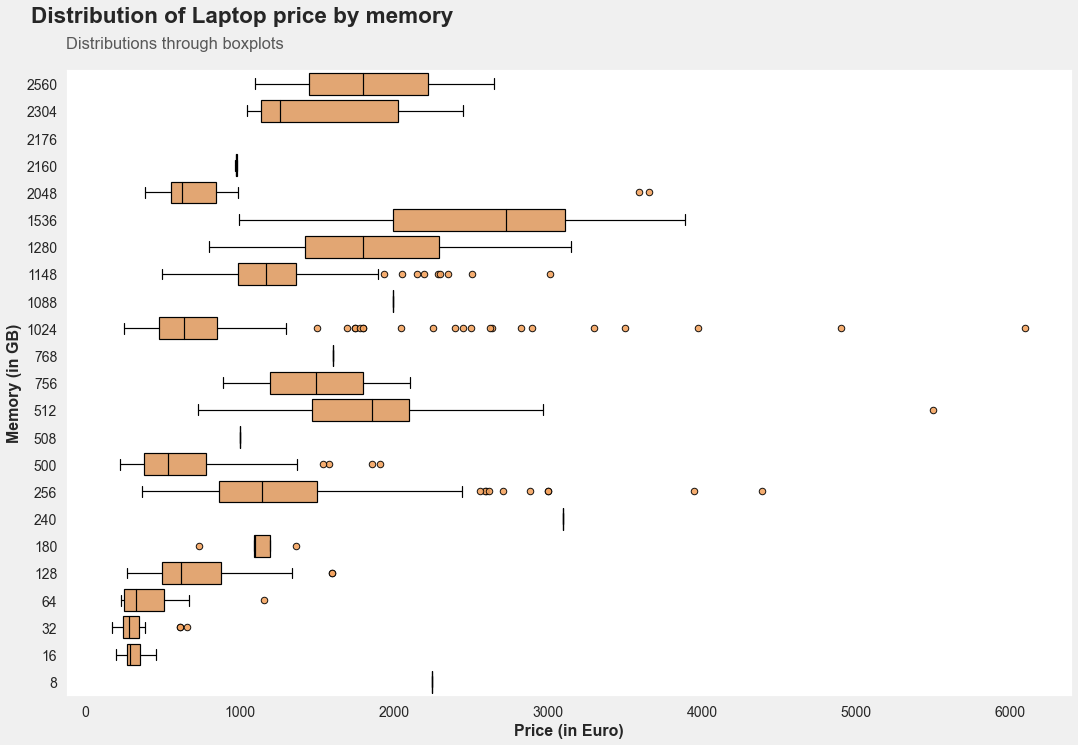

In [398]:
# Converting Memory Disk Space to numbers only
df['Memory'] = df['Memory'].replace(['128GB SSD', '128GB Flash Storage', '128GB HDD'], '128')
df['Memory'] = df['Memory'].replace(['256GB SSD', '256GB Flash Storage'], '256')
df['Memory'] = df['Memory'].replace(['512GB SSD', '256GB SSD +  256GB SSD', '512GB Flash Storage'], '512')
df['Memory'] = df['Memory'].replace(['500GB HDD'], '500')
df['Memory'] = df['Memory'].replace(['1TB HDD', '1TB SSD', '1.0TB Hybrid', '512GB SSD +  512GB SSD', '1.0TB HDD'], '1024')
df['Memory'] = df['Memory'].replace(['2TB HDD', '1TB SSD +  1TB HDD', '1TB HDD +  1TB HDD',], '2048')
df['Memory'] = df['Memory'].replace(['128GB SSD +  2TB HDD'], '2160')
df['Memory'] = df['Memory'].replace(['32GB Flash Storage', '32GB SSD', '32GB HDD'], '32')
df['Memory'] = df['Memory'].replace(['256GB SSD +  500GB HDD'], '756')
df['Memory'] = df['Memory'].replace(['16GB Flash Storage', '16GB SSD'], '16')
df['Memory'] = df['Memory'].replace(['128GB SSD +  1TB HDD'], '1148')
df['Memory'] = df['Memory'].replace(['64GB Flash Storage', '64GB SSD'], '64')
df['Memory'] = df['Memory'].replace(['180GB SSD'], '180')
df['Memory'] = df['Memory'].replace(['240GB SSD'], '240')
df['Memory'] = df['Memory'].replace(['512GB SSD +  256GB SSD'], '768')
df['Memory'] = df['Memory'].replace(['256GB SSD +  1TB HDD', '256GB SSD +  1.0TB Hybrid'], '1280')
df['Memory'] = df['Memory'].replace(['512GB SSD +  1TB HDD', '512GB SSD +  1.0TB Hybrid'], '1536')
df['Memory'] = df['Memory'].replace(['256GB SSD +  2TB HDD'], '2304')
df['Memory'] = df['Memory'].replace(['128GB SSD +  2TB HDD'], '2176')
df['Memory'] = df['Memory'].replace(['512GB SSD +  2TB HDD'], '2560')
df['Memory'] = df['Memory'].replace(['8GB SSD'], '8')
df['Memory'] = df['Memory'].replace(['508GB Hybrid'], '508')
df['Memory'] = df['Memory'].replace(['64GB Flash Storage +  1TB HDD'], '1088')

plot_box(x = "Price_euros", y = "Memory", xlabel = 'Price (in Euro)', ylabel = "Memory (in GB)", title = "Distribution of Laptop price by memory",
         subtitle = "Distributions through boxplots", color = "sandybrown", title_position = 0.175, subtitle_position = 0.108,
         order = ["2560", "2304", "2176", "2160", "2048", "1536", "1280", "1148", "1088", "1024", "768", "756", "512", "508", "500", "256", "240", "180", "128", "64", "32", "16", "8"])

df["Memory"] = df["Memory"].astype('int')

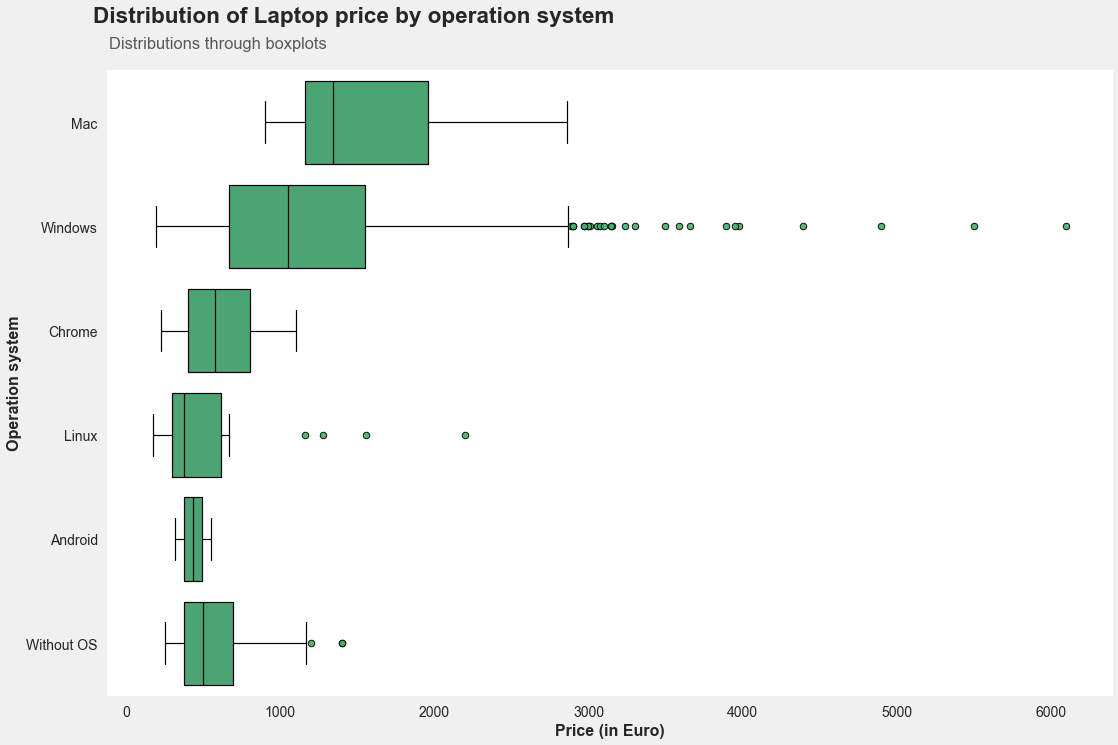

In [399]:
df['OpSys'] = np.select(
       [df['OpSys'].isin(["macOS", "Mac OS X"]), 
        df['OpSys'].isin(["Windows 10", "Windows 7", 'Windows 10 S']),
        df['OpSys'].isin(["Chrome OS"]),
        df['OpSys'].isin(["Linux"]),
        df['OpSys'].isin(["Android"]),
        df['OpSys'].isin(["No OS"])], 
        ['Mac', 'Windows', 'Linux', 'Chrome', 'Android', 'Without OS'], 
    default = 'Unknown')

plot_box(x = "Price_euros", y = "OpSys", xlabel = 'Price (in Euro)', ylabel = "Operation system", title = "Distribution of Laptop price by operation system",
         subtitle = "Distributions through boxplots", color = "mediumseagreen", order = ['Mac', 'Windows', 'Chrome', 'Linux', 'Android', 'Without OS'],
         title_position = 0.245, subtitle_position = 0.11)

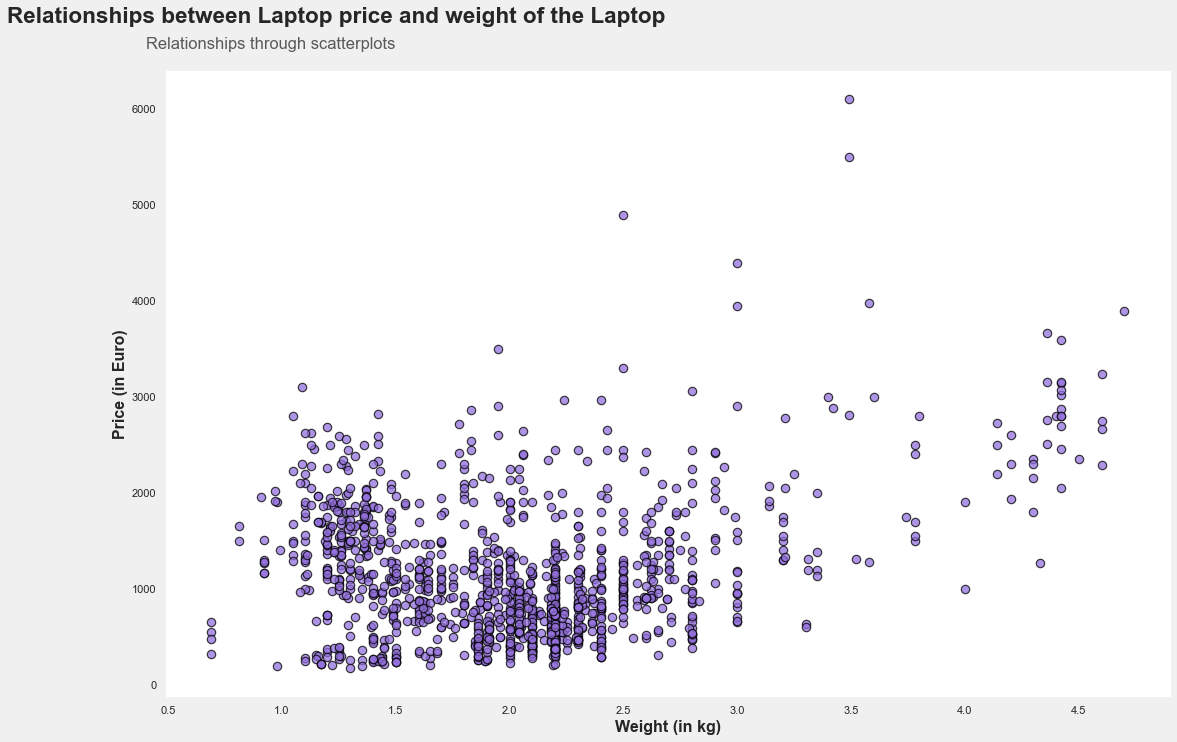

In [400]:
df["Weight"] = df["Weight"].str.extract('(\d*\.?\d*)', expand=False).astype(float)

plot_scatter(x = "Weight", y = "Price_euros", ylabel = 'Price (in Euro)', xlabel = "Weight (in kg)", title = "Relationships between Laptop price and weight of the Laptop",
             subtitle = "Relationships through scatterplots", color = "mediumpurple", title_position = 0.17, subtitle_position = 0.105, 
             size = 70, alpha = 0.75)

<AxesSubplot:xlabel='Company', ylabel='count'>

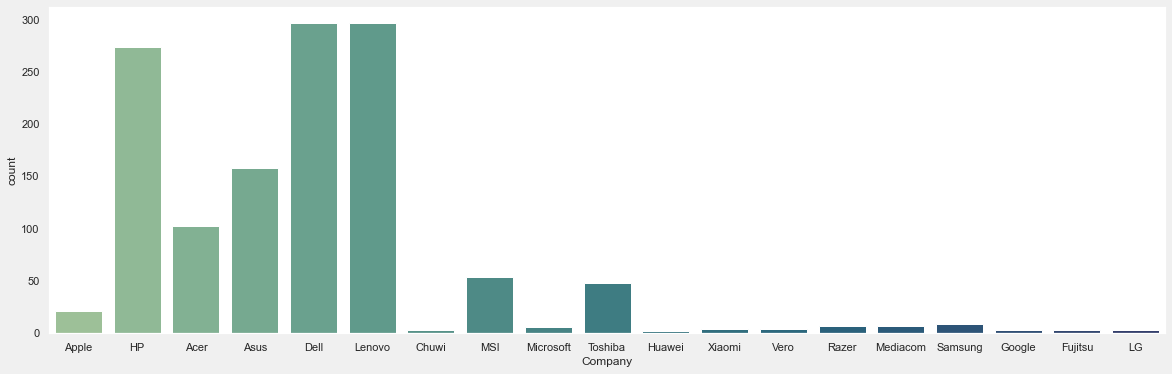

In [410]:
# Brand that manufactures most Laptops
fig_dims = (20, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x="Company", data=df, palette='crest')

<AxesSubplot:>

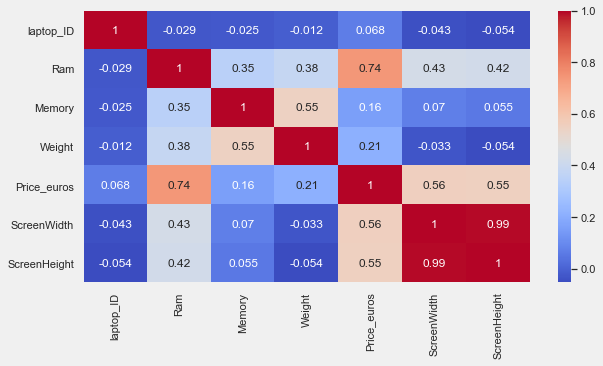

In [362]:
plt.figure(figsize=(10,5))
df_corr= df.corr()
sns.heatmap(df_corr,cmap="coolwarm",annot=True)


In [363]:
df

,laptop_ID,Company,Product,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,ScreenWidth,ScreenHeight
0,1,Apple,MacBook Pro,Ultrabook,< 14,Intel Core i5,8,128,Intel Graphics,Mac,1.37,1339.69,2560,1600
1,2,Apple,Macbook Air,Ultrabook,< 14,Intel Core i5,8,128,Intel Graphics,Mac,1.34,898.94,1440,900
2,3,HP,250 G6,Notebook,14-16,Intel Core i5,8,256,Intel Graphics,Without OS,1.86,575.00,1920,1080
3,4,Apple,MacBook Pro,Ultrabook,14-16,Intel Core i7,16,512,AMD,Mac,1.83,2537.45,2880,1800
4,5,Apple,MacBook Pro,Ultrabook,< 14,Intel Core i5,8,256,Intel Graphics,Mac,1.37,1803.60,2560,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1316,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14-16,Intel Core i7,4,128,Intel Graphics,Windows,1.80,638.00,1920,1080
1299,1317,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,< 14,Intel Core i7,16,512,Intel Graphics,Windows,1.30,1499.00,3200,1800
1300,1318,Lenovo,IdeaPad 100S-14IBR,Notebook,14-16,Intel Other,2,64,Intel Graphics,Windows,1.50,229.00,1366,768
1301,1319,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,14-16,Intel Core i7,6,1024,AMD,Windows,2.19,764.00,1366,768


In [364]:
df.dtypes

laptop_ID         int64
Company          object
Product          object
TypeName         object
Inches           object
Cpu              object
Ram               int32
Memory            int32
Gpu              object
OpSys            object
Weight          float64
Price_euros     float64
ScreenWidth       int32
ScreenHeight      int32
dtype: object

In [365]:
#dropping irrelevant columns

df = df.drop(columns = ['laptop_ID', 'Product'])


In [366]:
df.describe()

,Ram,Memory,Weight,Price_euros,ScreenWidth,ScreenHeight
count,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000
mean,8.382195,619.782041,2.038734,1123.686992,1894.784344,1070.830391
std,5.084665,479.334884,0.665475,699.009043,494.641028,284.519410
min,2.000000,8.000000,0.690000,174.000000,1366.000000,768.000000
25%,4.000000,256.000000,1.500000,599.000000,1600.000000,900.000000
50%,8.000000,500.000000,2.040000,977.000000,1920.000000,1080.000000
75%,8.000000,1024.000000,2.300000,1487.880000,1920.000000,1080.000000
max,64.000000,2560.000000,4.700000,6099.000000,3840.000000,2160.000000


In [367]:

#One Hot Encoding

df_dummy = pd.get_dummies(df, columns = ['Company', 'TypeName', "Inches", 'Cpu', 'Gpu', 'OpSys'])
df = df.merge(df_dummy, left_index = False, right_index = False)

df = df.drop(columns = ['Company', 'TypeName', "Inches", 'Cpu', 'Gpu', 'OpSys'])
print("Shapes of model database: ", df.shape)

Shapes of model database:  (1415, 51)


In [368]:
df.describe()

,Ram,Memory,Weight,Price_euros,ScreenWidth,ScreenHeight,Company_Acer,Company_Apple,Company_Asus,Company_Chuwi,...,Gpu_ARM,Gpu_Intel Graphics,Gpu_Nvidia GeForce,Gpu_Nvidia Quadro/GTX,OpSys_Android,OpSys_Chrome,OpSys_Linux,OpSys_Mac,OpSys_Windows,OpSys_Without OS
count,1415.000000,1415.000000,1415.000000,1415.000000,1415.000000,1415.000000,1415.000000,1415.000000,1415.000000,1415.000000,...,1415.000000,1415.000000,1415.000000,1415.000000,1415.000000,1415.000000,1415.000000,1415.000000,1415.000000,1415.000000
mean,8.165371,621.077032,2.036742,1083.078410,1874.018375,1058.733569,0.077032,0.014841,0.132155,0.002120,...,0.000707,0.562544,0.271378,0.022615,0.001413,0.052297,0.019081,0.014841,0.865018,0.047350
std,5.016895,473.089893,0.650598,690.993619,496.326747,285.167712,0.266736,0.120959,0.338779,0.046012,...,0.026584,0.496248,0.444828,0.148725,0.037582,0.222704,0.136859,0.120959,0.341826,0.212461
min,2.000000,8.000000,0.690000,174.000000,1366.000000,768.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,256.000000,1.500000,572.500000,1366.000000,768.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,8.000000,500.000000,2.050000,911.000000,1920.000000,1080.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,8.000000,1024.000000,2.300000,1426.830000,1920.000000,1080.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,64.000000,2560.000000,4.700000,6099.000000,3840.000000,2160.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [369]:
df

,Ram,Memory,Weight,Price_euros,ScreenWidth,ScreenHeight,Company_Acer,Company_Apple,Company_Asus,Company_Chuwi,...,Gpu_ARM,Gpu_Intel Graphics,Gpu_Nvidia GeForce,Gpu_Nvidia Quadro/GTX,OpSys_Android,OpSys_Chrome,OpSys_Linux,OpSys_Mac,OpSys_Windows,OpSys_Without OS
0,8,128,1.37,1339.69,2560,1600,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,8,128,1.34,898.94,1440,900,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
2,8,256,1.86,575.00,1920,1080,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
3,16,512,1.83,2537.45,2880,1800,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,8,256,1.37,1803.60,2560,1600,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1410,6,1024,2.19,764.00,1366,768,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1411,6,1024,2.19,764.00,1366,768,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1412,6,1024,2.19,764.00,1366,768,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1413,6,1024,2.19,764.00,1366,768,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [370]:
df_dummy

,Ram,Memory,Weight,Price_euros,ScreenWidth,ScreenHeight,Company_Acer,Company_Apple,Company_Asus,Company_Chuwi,...,Gpu_ARM,Gpu_Intel Graphics,Gpu_Nvidia GeForce,Gpu_Nvidia Quadro/GTX,OpSys_Android,OpSys_Chrome,OpSys_Linux,OpSys_Mac,OpSys_Windows,OpSys_Without OS
0,8,128,1.37,1339.69,2560,1600,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,8,128,1.34,898.94,1440,900,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
2,8,256,1.86,575.00,1920,1080,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
3,16,512,1.83,2537.45,2880,1800,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,8,256,1.37,1803.60,2560,1600,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,4,128,1.80,638.00,1920,1080,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1299,16,512,1.30,1499.00,3200,1800,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1300,2,64,1.50,229.00,1366,768,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1301,6,1024,2.19,764.00,1366,768,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [371]:
#Normalizing
from sklearn.preprocessing import Normalizer
norm = Normalizer()

norm_values = norm.fit_transform(df[["Ram", "Memory","Weight","ScreenWidth","ScreenHeight"]])
norm_cols = ["norm_ram", "norm_memory","norm_weight","norm_screen_width","norm_screen_height"]

In [372]:
df_1=pd.DataFrame(norm_values, columns=norm_cols)
df_1

,norm_ram,norm_memory,norm_weight,norm_screen_width,norm_screen_height
0,0.002648,0.042362,0.000453,0.847234,0.529521
1,0.004698,0.075164,0.000787,0.845590,0.528494
2,0.003607,0.115432,0.000839,0.865743,0.486981
3,0.004658,0.149069,0.000533,0.838514,0.524071
4,0.002641,0.084496,0.000452,0.844963,0.528102
...,...,...,...,...,...
1410,0.003205,0.547008,0.001170,0.729700,0.410256
1411,0.003205,0.547008,0.001170,0.729700,0.410256
1412,0.003205,0.547008,0.001170,0.729700,0.410256
1413,0.003205,0.547008,0.001170,0.729700,0.410256


In [373]:
df_2=df
df_2=df_2.drop(["Ram", "Memory","Weight","ScreenWidth","ScreenHeight","Price_euros"], axis=1)
df_2

,Company_Acer,Company_Apple,Company_Asus,Company_Chuwi,Company_Dell,Company_Fujitsu,Company_Google,Company_HP,Company_Huawei,Company_LG,...,Gpu_ARM,Gpu_Intel Graphics,Gpu_Nvidia GeForce,Gpu_Nvidia Quadro/GTX,OpSys_Android,OpSys_Chrome,OpSys_Linux,OpSys_Mac,OpSys_Windows,OpSys_Without OS
0,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1410,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1411,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1412,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1413,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [374]:
df_final = pd.concat([df_2, df_1], axis=1)
df_final

,Company_Acer,Company_Apple,Company_Asus,Company_Chuwi,Company_Dell,Company_Fujitsu,Company_Google,Company_HP,Company_Huawei,Company_LG,...,OpSys_Chrome,OpSys_Linux,OpSys_Mac,OpSys_Windows,OpSys_Without OS,norm_ram,norm_memory,norm_weight,norm_screen_width,norm_screen_height
0,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0.002648,0.042362,0.000453,0.847234,0.529521
1,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0.004698,0.075164,0.000787,0.845590,0.528494
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0.003607,0.115432,0.000839,0.865743,0.486981
3,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0.004658,0.149069,0.000533,0.838514,0.524071
4,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0.002641,0.084496,0.000452,0.844963,0.528102
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1410,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0.003205,0.547008,0.001170,0.729700,0.410256
1411,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0.003205,0.547008,0.001170,0.729700,0.410256
1412,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0.003205,0.547008,0.001170,0.729700,0.410256
1413,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0.003205,0.547008,0.001170,0.729700,0.410256


In [375]:
#Since the correlation between Height and Weight is 0.99 and very high, we can drop one of the columns to have a better model
df_final = df_final.drop(columns = ['norm_screen_width'])

In [376]:
X = df_final
y = df["Price_euros"].fillna(value=np.mean(df["Price_euros"]))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
pred_values = lin_reg.predict(X_test)


In [377]:
mean_squared_error(y_test, pred_values)

4.380574556558843e+29

In [378]:
df_final.shape

(1415, 49)

In [379]:

def final_model(model):
  model = model()
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  error_term = mean_squared_error(y_test, pred_values)
  print("Error: ", error_term)

In [315]:
final_model(LinearRegression)

Error:  4.380574556558843e+29


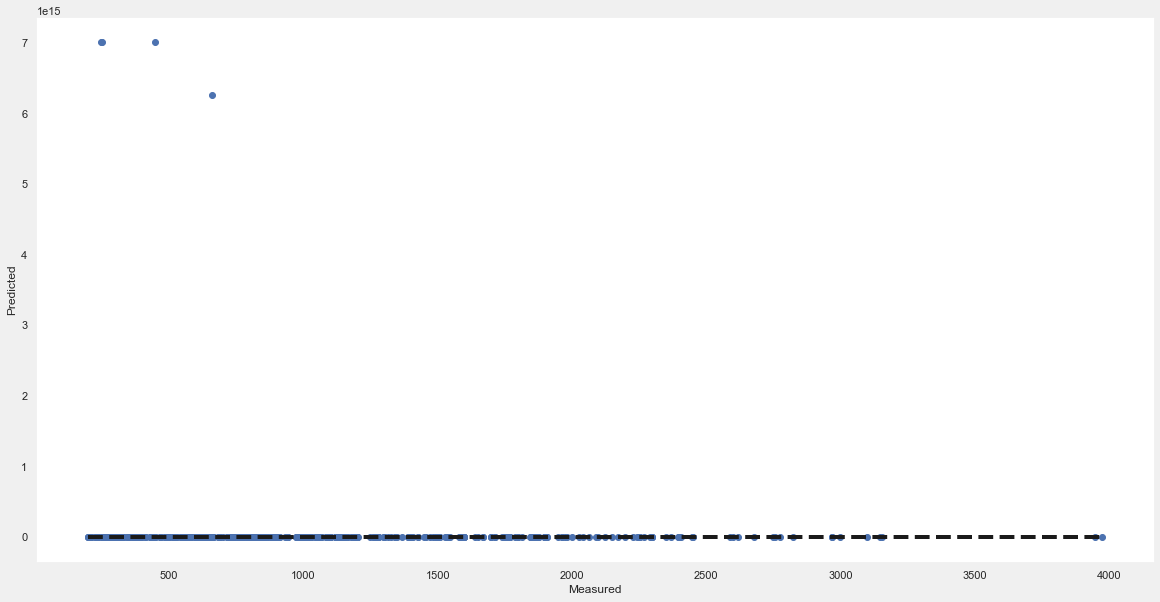